<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/Ecuaci%C3%B3n_de_onda_M%C3%A9todo_expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=9> Ecuación de onda.  </font>

----

<font size=4 color="lime">
Resolver el problema propuesto en la imagen adjunta usando el Método explícito</font>


<font size=2> $$u_{i,j+1} - u_{i,j} = \frac{1}{2} \left[ \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2} \right]$$

<font size=2>$$u_{i,j+1} = r(u_{i-1,j}) + (1 - 2r)u_{i,j} + r(u_{i+1,j})$$


In [1]:
# Librerias
import sympy as sp
import numpy as np

In [41]:
def f(x):                                        # Definimos la funcion que evalua x
    return np.sin(np.pi*x)                       # Nos regresa el valor f(x)

In [39]:
# Valores de inicio
n=9     # Tamaño de la Matriz
j = 100 # Número de pasos
# Variables de la matriz A
dp = 0      # Valor en la diagonal principal
ds = 1     # Valor en las diagonales superior e inferior

In [40]:
A = sp.Matrix(                          # Creamos la matriz con sp, para que tenga el mismo formato
        np.diag(np.full(n, dp)) +          # Indicamos que la diagonal principal sean 3, 9x3
        np.diag(np.full(n-1, ds), k=1) +   # Indicamos que la diagonal superior sean -1, 8x1
        np.diag(np.full(n-1, ds), k=-1))   # Indicamos que la diagonal inferior sean -1, 8x1

print("Matriz A usando NumPy \n")
A

Matriz A usando NumPy 



Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [42]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])
b1=b.copy()
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [43]:
import matplotlib.pyplot as plt # Gráficas 2D
from mpl_toolkits.mplot3d import Axes3D # Gráficas 3D
from matplotlib import cm # Mapas de colores
from tabulate import tabulate # Tablas

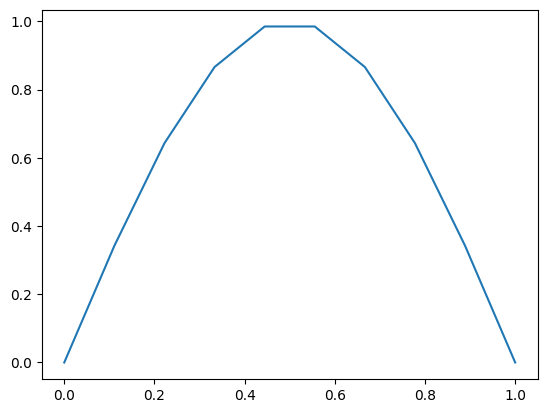

In [44]:
x = np.linspace(0,1,10) # No.nodos
plt.plot(x,f(x))

In [45]:
def onda(A, b, b1, j):
    b = sp.Matrix(b)                # Convertimos u0 a matriz columna
    u1 = sp.Matrix(b1)              # Convertimos u1 a matriz columna
    S = [b, b1]                     # Lista para almacenar los estados

    for n in range(2, j):           # Iteramos desde el tercer paso
        sol = A * S[n-1] - S[n-2]   # Fórmula de recurrencia de la onda
        S.append(sol)               # Guardamos el nuevo estado

    return sp.Matrix([s.T for s in S]) # Regresamos todos los estados como filas

In [49]:
U = onda(A, b, b1, j) # Calculamos la solución de la onda hasta j
#U

In [50]:
data = [list(U.row(i)) for i in range(5)]  # Creamos una lista con los (primeros 5) datos de U (el método Crank–Nicolson)
print(tabulate(data, tablefmt="grid"))     # Imprimimos los datos

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.309017 | 0.587785 | 0.809017 | 0.951057 | 1        | 0.951057 | 0.809017 | 0.587785 | 0.309017 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.309017 | 0.587785 | 0.809017 | 0.951057 | 1        | 0.951057 | 0.809017 | 0.587785 | 0.309017 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.278768 | 0.530249 | 0.729825 | 0.85796  | 0.902113 | 0.85796  | 0.729825 | 0.530249 | 0.278768 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.221232 | 0.420808 | 0.579192 | 0.680881 | 0.715921 | 0.680881 | 0.579192 | 0.420808 | 0.221232 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.14204  | 0.270175 | 0.371864 | 0.437153 | 0.45965  | 0.437153 | 0.371864 | 0.270175 | 0

<font size=4 color="lime">Ejercicio 1: </font>

<font size=3> <p>Ejercicio 1: Generar las gráficas 2D y 3D de la solución hasta t=0.50 </p><p>
</p><p>
Observe hasta que valor de t llega.</font>

----

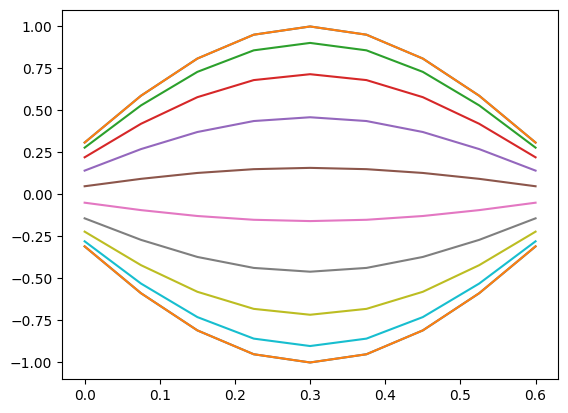

In [55]:
# Grafica
U_np = np.array(U.tolist(), dtype=float)                      # Convertimos la matriz U de Sympy a NumPy

# Codigo extraido de Github
x = np.linspace(0, 0.6, 9) # No. nodos espaciales
y = np.linspace(0, 0.5, j) # Nodos temporales
for i in range(12): # Graficamos los primeros 12 tiempos
    plt.plot(x, U_np[i]) # tiempo i

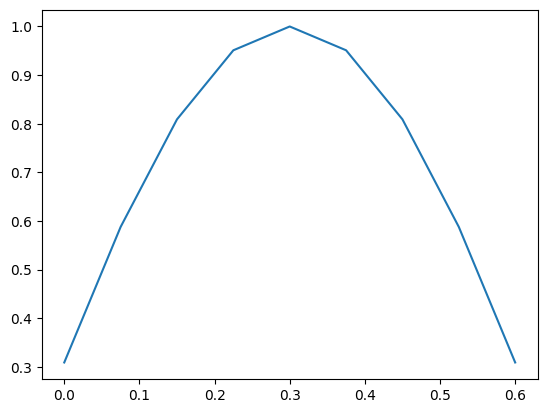

In [56]:
plt.plot(x, U_np[0]) # Graficamos solo el estado inicial

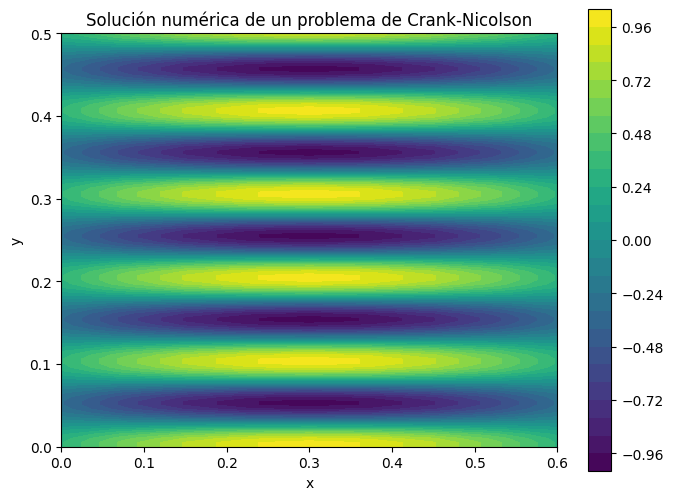

In [57]:
# Grafica
# Codigo extraido de Github
X, Y = np.meshgrid(x, y)
# Mapa de colores
plt.figure(figsize=(8, 6))                                    #Tamaño de la grafiica
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)                                         #Barra de colores
plt.title('Solución numérica de un problema de Crank-Nicolson')    #Titulo
plt.xlabel('x')                                               #Eje X
plt.ylabel('y')                                               #Eje Y
plt.gca().set_aspect('equal', adjustable='box')               #Aspecto de la grafica
plt.show()

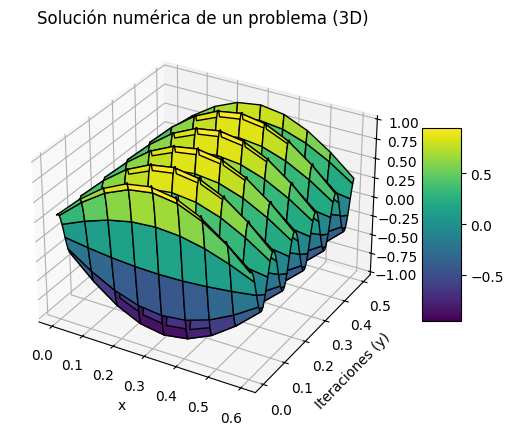

In [58]:
# Grafica 3D
# Codigo extraido de Github
#%matplotlib notebook
fig = plt.figure(figsize=(7,5))                                 # Figura 7x5
ax = fig.add_subplot(111, projection='3d')                      # Agrega un subplot en 3D dentro de la figura
surf = ax.plot_surface(X, Y, U_np,cmap='viridis',edgecolor='k') # Configuración del 3D
ax.set_title('Solución numérica de un problema (3D)')           # Título de la gráfica
ax.set_xlabel('x')                                              # Eje x
ax.set_ylabel('Iteraciones (y)')                                # Eje y
ax.set_zlabel('U(x,y)')                                         # Eje z (solución)
fig.colorbar(surf, shrink=0.5, aspect=5)                        # Barra de colores
plt.show()                                                      # Mostrar la gráfica

In [69]:
# Solución numérica
n = 20
v_es = U_np[n] # Valor numérico en t = 1.0
num = np.array(list(v_es)) # Añadimos condiciones de frontera u=0 en x=0 y x=1
v_ex = np.array([0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163, 1.0000000000, 0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944]) # Valores exactos de la Tabla 12.6


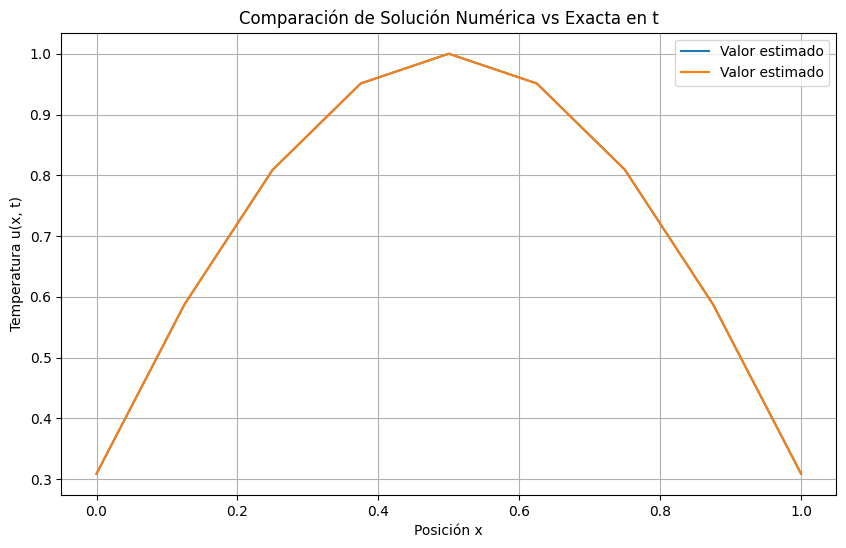

In [70]:
# Grafica
x = np.linspace(0, 1, len(v_ex)) # Vector de x
plt.figure(figsize=(10, 6))                           # Un tamaño de grafica de 10,6
plt.plot(x,v_es, label='Valor estimado')              # Valores del valor estimado
plt.plot(x,v_ex, label='Valor estimado')              # Valores del valor real
plt.title('Comparación de Solución Numérica vs Exacta en t')     # Titulo
plt.xlabel('Posición x')                              # Eje X
plt.ylabel('Temperatura u(x, t)')                     # Eje Y
plt.legend()                                          # Mostrar los titulos de las lineas
plt.grid()                                            # Mostrar la cuadricula
plt.show()

<font size=4 color="lime">Ejercicio 2/3: </font>

<font size=4> <p>Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.</p></font>

----

In [71]:
# Error
error_abs = np.abs(np.array(v_ex) - np.array(v_es))                # Guardamos el valor de la diferecia entre los valores
data_e = list(zip(v_ex, v_es, error_abs))                          # Guardamos los valores en una lista de datos_error

print(tabulate(data_e,tablefmt="heavy_grid",headers=["Valor real", "Valor esperado", "Error"]))     # Imprimimos los datos

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃   Valor real ┃   Valor esperado ┃       Error ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.309017 ┃         0.309017 ┃ 2.50527e-11 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.587785 ┃         0.587785 ┃ 7.52731e-12 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.809017 ┃         0.809017 ┃ 2.50527e-11 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.951057 ┃         0.951057 ┃ 4.84657e-12 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     1        ┃         1        ┃ 0           ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.951057 ┃         0.951057 ┃ 4.84679e-12 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.809017 ┃         0.809017 ┃ 2.50527e-11 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.587785 ┃         0.587785 ┃ 7.52642e-12 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.309017 ┃         0.309017 ┃ 2.50525e-11 ┃


<font size=4 color="lime">Ejercicio 4: </font>

<font size=4> <p>Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.</p></font>

----

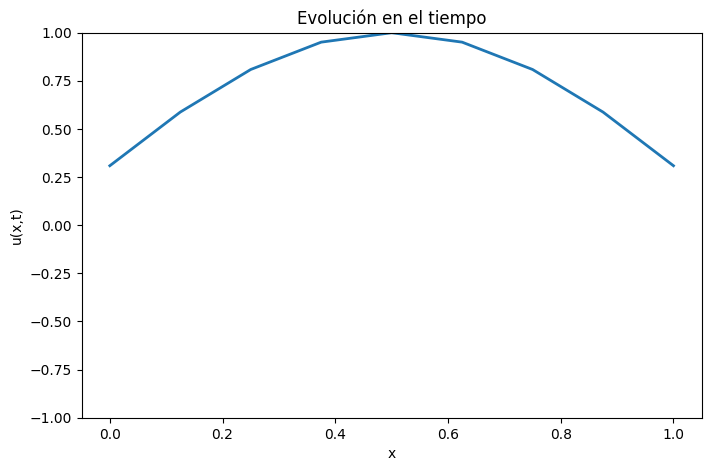

In [75]:
# Grafica Animada
# Codigo extraido de Github
#%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

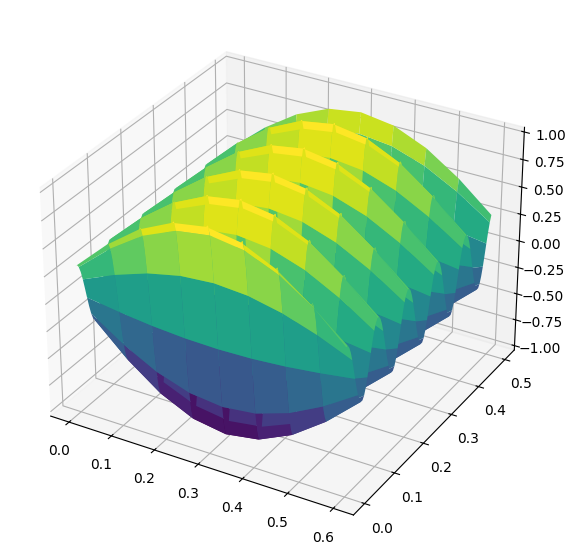

In [72]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis)
plt.show()